In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
instagramveri=pd.read_csv('/content/drive/My Drive/CSS2 - Group 2 Folder/final-v1.csv')

   edge_followed_by  edge_follow  username_length  username_has_number  \
0             0.001        0.257               13                    1   
1             0.000        0.958                9                    1   
2             0.000        0.253               12                    0   
3             0.000        0.977               10                    1   
4             0.000        0.321               11                    0   

   full_name_has_number  full_name_length  is_private  is_joined_recently  \
0                     1                13           0                   0   
1                     0                 0           0                   1   
2                     0                 0           0                   0   
3                     0                 0           0                   0   
4                     0                11           1                   0   

   has_channel  is_business_account  has_guides  has_external_url  is_fake  
0            0 

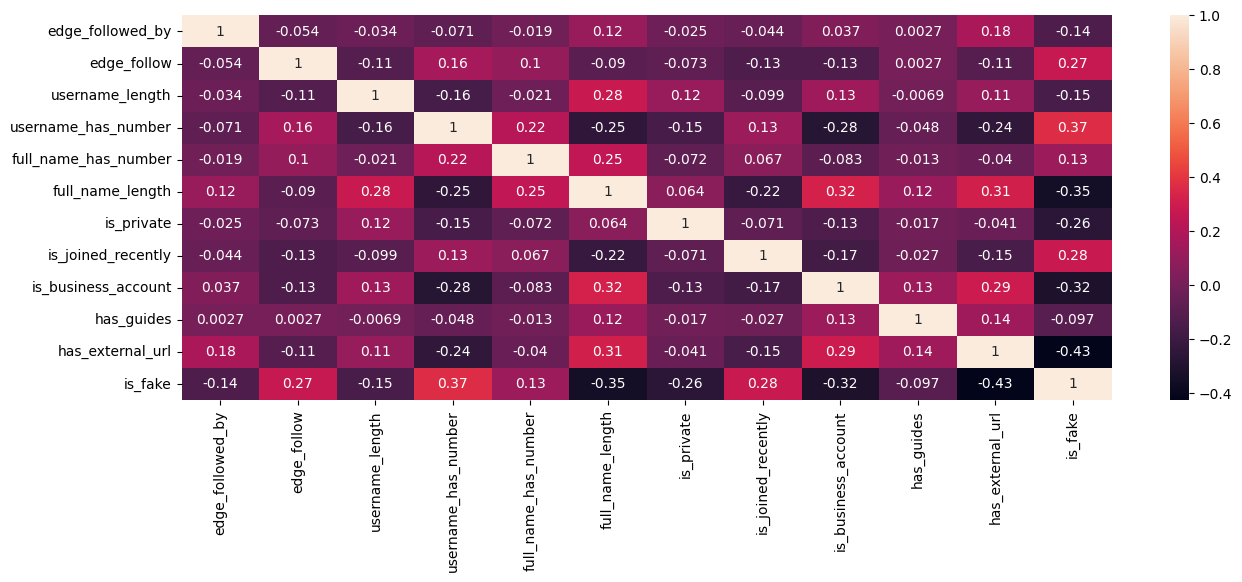

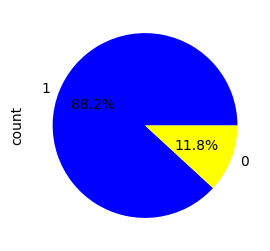

Decision Tree Classifier Results:
Confusion Matrix:
 [[ 13   1]
 [  3 101]]
Accuracy Score: 0.9661016949152542
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.99      0.97      0.98       104

    accuracy                           0.97       118
   macro avg       0.90      0.95      0.92       118
weighted avg       0.97      0.97      0.97       118

Random Forest Classifier Results:
Confusion Matrix:
 [[ 13   1]
 [  1 103]]
Accuracy Score: 0.9830508474576272
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.99      0.99      0.99       104

    accuracy                           0.98       118
   macro avg       0.96      0.96      0.96       118
weighted avg       0.98      0.98      0.98       118



In [2]:


# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/content/drive/My Drive/CSS2 - Group 2 Folder/final-v1.csv"
instagram_data = pd.read_csv(file_path)

# Explore the dataset
print(instagram_data.head())
print(instagram_data.tail())
print(instagram_data.shape)
print(instagram_data.columns)
print(instagram_data.info())
print(instagram_data.isnull().sum())
print(instagram_data.describe().T)

# Data preprocessing
instagram_data = instagram_data.drop(['has_channel'], axis=1)

# Correlation matrix
corr = instagram_data.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr, annot=True)

# Visualize target distribution
plt.figure(figsize=(3, 3))
colors = ['blue', 'yellow']
instagram_data['is_fake'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
plt.show()

# Split data into features and target
X = instagram_data.drop(['is_fake'], axis=1)
y = instagram_data['is_fake']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=41)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier
dt_classifier.fit(X_train_scaled, y_train)

# Evaluate the Decision Tree classifier
y_pred_dt = dt_classifier.predict(X_test_scaled)
print("Decision Tree Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Train the Random Forest classifier
rf_classifier.fit(X_train_scaled, y_train)

# Evaluate the Random Forest classifier
y_pred_rf = rf_classifier.predict(X_test_scaled)
print("Random Forest Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


In [12]:
# Function to generate a random feature subset
def generate_random_feature_subset(num_features):
    return np.random.choice(range(X_train_scaled.shape[1]), num_features, replace=False)

# Function to evaluate the fitness of a feature subset
def evaluate_fitness(feature_subset):
    # Select features based on the subset
    X_train_subset = X_train_scaled[:, feature_subset]
    X_test_subset = X_test_scaled[:, feature_subset]

    # Train the classifier
    rf_classifier.fit(X_train_subset, y_train)

    # Evaluate accuracy on the validation set
    y_pred_subset = rf_classifier.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred_subset)

    return accuracy

# Genetic Algorithm loop
population_size = 20
num_generations = 50
num_features = X_train_scaled.shape[1]
mutation_rate = 0.1

# Initialize the population with random feature subsets
population = [generate_random_feature_subset(num_features) for _ in range(population_size)]

# Evolution loop
for generation in range(num_generations):
    # Evaluate the fitness of each individual in the population
    fitness_scores = [evaluate_fitness(individual) for individual in population]

    # Select the top performing individuals as parents for the next generation
    top_indices = np.argsort(fitness_scores)[-population_size//2:]
    parents = [population[i] for i in top_indices]
    # Flatten the parents list
    parents_flat = [item for sublist in parents for item in sublist]

    # Create offspring through crossover and mutation
    offspring = []
    while len(offspring) < population_size:
        parent1, parent2 = np.random.choice(parents_flat, size=2, replace=False)
        crossover_point = np.random.randint(0, min(len(parent1), len(parent2)))
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        mutation_mask = np.random.rand(num_features) < mutation_rate
        child[mutation_mask] = np.random.choice(num_features, np.sum(mutation_mask), replace=False)
        offspring.append(child)

    # Replace the old population with the new generation
    population = offspring

# Select the best individual from the final population
best_individual = population[np.argmax([evaluate_fitness(individual) for individual in population])]

# Evaluate the best individual on the test set
X_train_best_subset = X_train_scaled[:, best_individual]
X_test_best_subset = X_test_scaled[:, best_individual]
rf_classifier.fit(X_train_best_subset, y_train)
y_pred_best_subset = rf_classifier.predict(X_test_best_subset)
print("Best Individual Results (with Feature Selection):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_subset))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best_subset))
print("Classification Report:\n", classification_report(y_test, y_pred_best_subset))


TypeError: object of type 'numpy.int64' has no len()